In [1]:
import pandas as pd
import numpy as nm

In [2]:
data = pd.read_csv(r'F:\Prodigy Infotech\twitter_training.csv\twitter_training.csv')

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [12]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
ps = PorterStemmer()

In [30]:
def preprocess_txt(text):
    if isinstance(text,str):
        tokens = word_tokenize(text.lower())
        filtered_tokens = [ps.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''

In [31]:
data['clean_text'] = data['im getting on borderlands and i will murder you all ,'].apply(preprocess_txt)

In [32]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [33]:
data['sentiment_score'] = data['clean_text'].apply(get_sentiment)

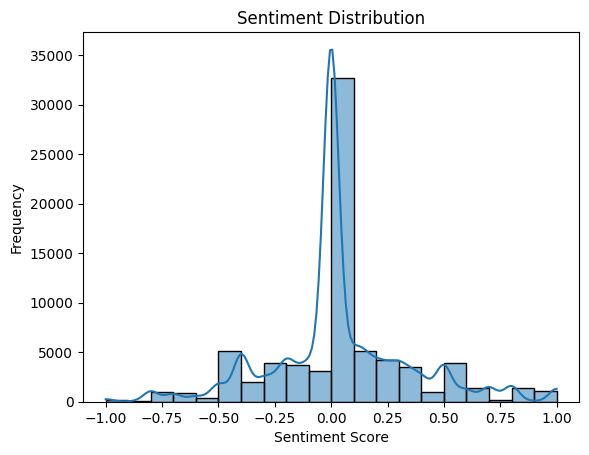

In [35]:
sns.histplot(data['sentiment_score'], bins = 20, kde = True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()